It's my first notbook so its so basic ,has a simple data preprocessing then I used logistic regression and SVM for prediction

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
#load our data
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")
test = pd.read_csv("../input/titanic/test.csv")
train = pd.read_csv("../input/titanic/train.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Separating and Splitting data**

I assumed that "PassengerId","Name","Ticket","Cabin" and "Fare" columns will not add usefull information to our prediction, so I dropped it.
also gender_submission ( as a test lable ) has an additional column which is "PassengerId", so I also dropped it.

In [4]:
y_train=pd.DataFrame(train["Survived"])
x_train=train.drop(["PassengerId","Name","Ticket","Cabin","Fare"],1)
x_test=test.drop(["PassengerId","Name","Ticket","Cabin","Fare"],1)
y_test=gender_submission.drop(["PassengerId"],1)

In [5]:
x_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [6]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [7]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S
...,...,...,...,...,...,...
413,3,male,NaN,0,0,S
414,1,female,39.0,0,0,C
415,3,male,38.5,0,0,S
416,3,male,NaN,0,0,S


In [8]:
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [9]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [10]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [11]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Survived    891 non-null int64
dtypes: int64(1)
memory usage: 7.1 KB


In [12]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
Survived    418 non-null int64
dtypes: int64(1)
memory usage: 3.4 KB


- from info we can see that age column in each of training and testing set has NaN values, and also Embarked column in traing set as we can see in the following cell .

In [13]:
print(x_train["Age"].isna().sum())
print(x_test["Age"].isna().sum())
print(x_train["Embarked"].isna().sum())

177
86
2


- Here I replaced the NaN values in age columns with the mean of ages, and replaced the NaN values in Embarked columns with the mode of Emparked columns

In [14]:
x_train["Age"]=x_train["Age"].fillna(value=x_train["Age"].mean())
x_test["Age"]=x_test["Age"].fillna(value=x_test["Age"].mean())
x_train["Embarked"]=x_train["Embarked"].fillna(value=x_train["Embarked"].mode()[0])
x_test["Embarked"]=x_test["Embarked"].fillna(value=x_test["Embarked"].mode()[0])

- Now we can print a gain and see that there is no NaN values

In [15]:
print(x_train["Age"].isna().sum())
print(x_test["Age"].isna().sum())
print(x_train["Embarked"].isna().sum())

0
0
0


- Embarked and Sex columns are not numerical so I converted it here to catigorical values

In [16]:
x_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


In [17]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.50000,0,0,Q
1,3,female,47.00000,1,0,S
2,2,male,62.00000,0,0,Q
3,3,male,27.00000,0,0,S
4,3,female,22.00000,1,1,S
...,...,...,...,...,...,...
413,3,male,30.27259,0,0,S
414,1,female,39.00000,0,0,C
415,3,male,38.50000,0,0,S
416,3,male,30.27259,0,0,S


In [18]:
x_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [19]:
sex={'male':0,'female':1}
emb={'Q':0,'S':1,'C':2}

In [20]:
x_train["Sex"]=x_train["Sex"].map(sex)
x_train["Embarked"]=x_train["Embarked"].map(emb)
x_test["Sex"]=x_test["Sex"].map(sex)
x_test["Embarked"]=x_test["Embarked"].map(emb)

In [21]:
x_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.000000,1,0,1
1,1,1,1,38.000000,1,0,2
2,1,3,1,26.000000,0,0,1
3,1,1,1,35.000000,1,0,1
4,0,3,0,35.000000,0,0,1
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,1
887,1,1,1,19.000000,0,0,1
888,0,3,1,29.699118,1,2,1
889,1,1,0,26.000000,0,0,2


In [22]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.50000,0,0,0
1,3,1,47.00000,1,0,1
2,2,0,62.00000,0,0,0
3,3,0,27.00000,0,0,1
4,3,1,22.00000,1,1,1
...,...,...,...,...,...,...
413,3,0,30.27259,0,0,1
414,1,1,39.00000,0,0,2
415,3,0,38.50000,0,0,1
416,3,0,30.27259,0,0,1


**Visualizing our data**

- The number of unsurvived peaple is greater than The number of survived.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa2b68b198>]],
      dtype=object)

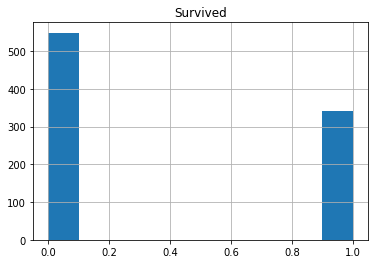

In [23]:
y_train.hist(column='Survived')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa2b5d1518>]],
      dtype=object)

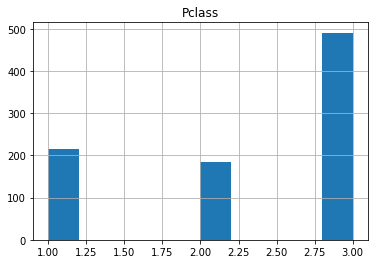

In [24]:
x_train.hist(column='Pclass')

- The number of survived males is greater than The number of survived females

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa2b562ef0>]],
      dtype=object)

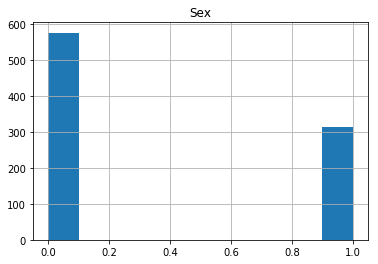

In [25]:
x_train.hist(column='Sex')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa2b5bb668>]],
      dtype=object)

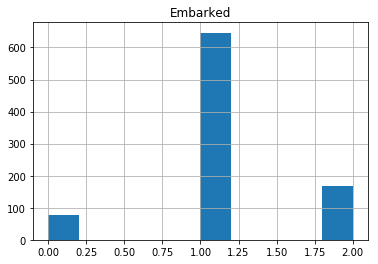

In [26]:
x_train.hist(column='Embarked')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa2b453358>]],
      dtype=object)

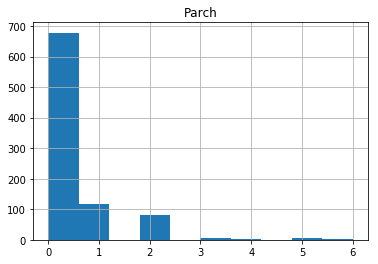

In [27]:
x_train.hist(column='Parch')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa2b4b2a20>]],
      dtype=object)

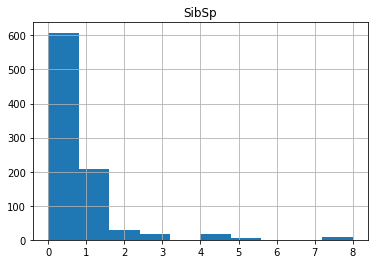

In [28]:
x_train.hist(column='SibSp')

- Most of unsurvived peaple are at the age of thirty

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa2b353908>]],
      dtype=object)

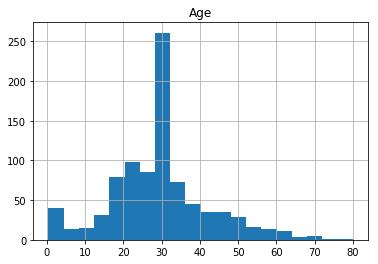

In [29]:
x_train.hist(column='Age',bins=20)

**Correlations**

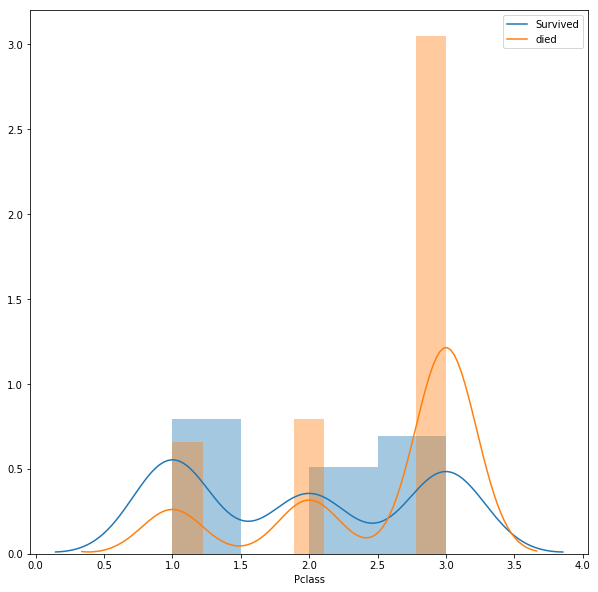

In [30]:
fig=plt.figure(figsize=(10,10))
sns.distplot(x_train.loc[x_train["Survived"]==1]["Pclass"],kde_kws={"label":"Survived"})
sns.distplot(x_train.loc[x_train["Survived"]==0]["Pclass"],kde_kws={"label":"died"})

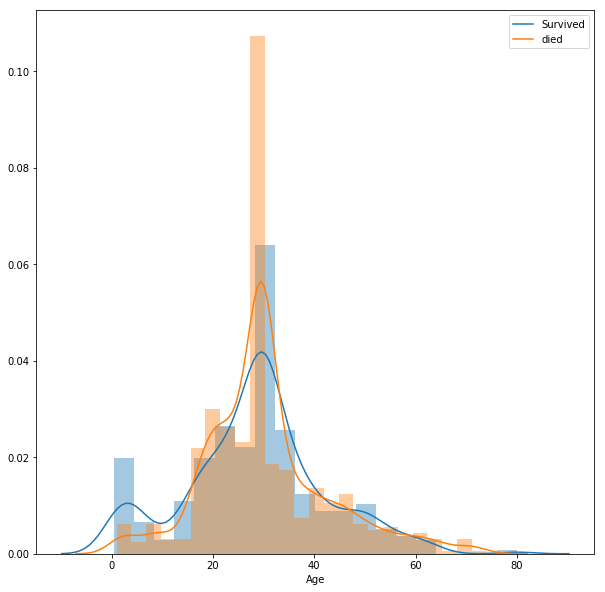

In [31]:
fig=plt.figure(figsize=(10,10))
sns.distplot(x_train.loc[x_train["Survived"]==1]["Age"],kde_kws={"label":"Survived"})
sns.distplot(x_train.loc[x_train["Survived"]==0]["Age"],kde_kws={"label":"died"})

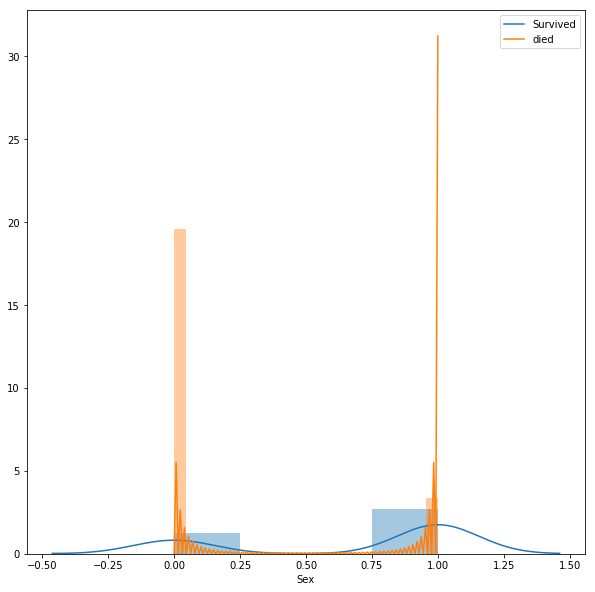

In [32]:
fig=plt.figure(figsize=(10,10))
sns.distplot(x_train.loc[x_train["Survived"]==1]["Sex"],kde_kws={"label":"Survived"})
sns.distplot(x_train.loc[x_train["Survived"]==0]["Sex"],kde_kws={"label":"died"})

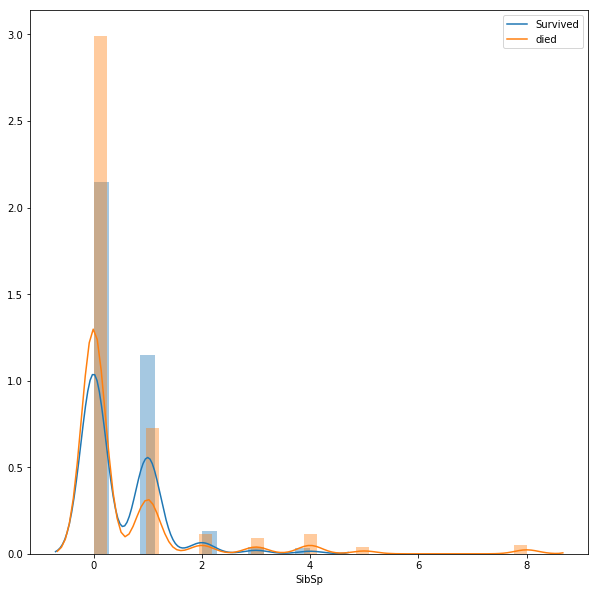

In [33]:
fig=plt.figure(figsize=(10,10))
sns.distplot(x_train.loc[x_train["Survived"]==1]["SibSp"],kde_kws={"label":"Survived"})
sns.distplot(x_train.loc[x_train["Survived"]==0]["SibSp"],kde_kws={"label":"died"})

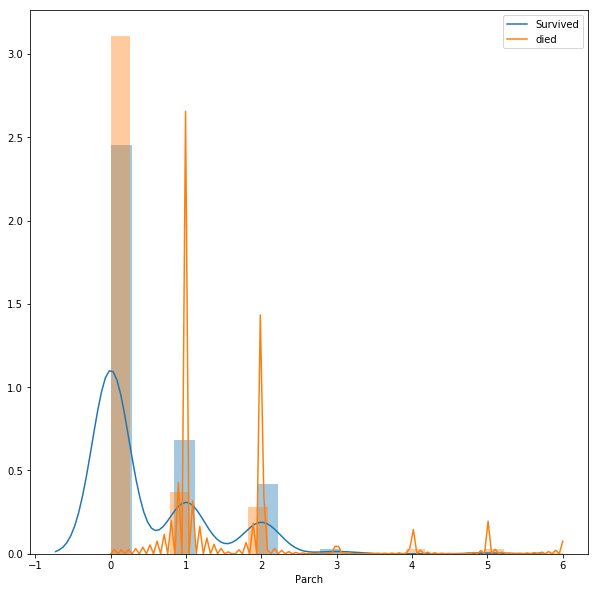

In [34]:
fig=plt.figure(figsize=(10,10))
sns.distplot(x_train.loc[x_train["Survived"]==1]["Parch"],kde_kws={"label":"Survived"})
sns.distplot(x_train.loc[x_train["Survived"]==0]["Parch"],kde_kws={"label":"died"})

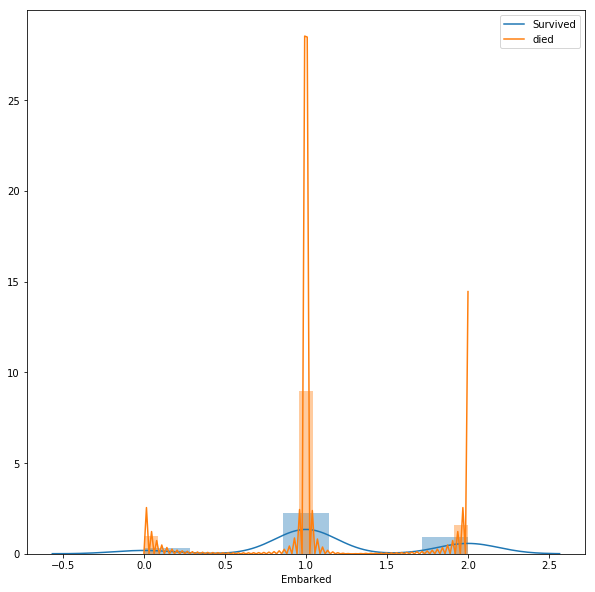

In [35]:
fig=plt.figure(figsize=(10,10))
sns.distplot(x_train.loc[x_train["Survived"]==1]["Embarked"],kde_kws={"label":"Survived"})
sns.distplot(x_train.loc[x_train["Survived"]==0]["Embarked"],kde_kws={"label":"died"})

- To read ages more easy I splitted it to four ranges

In [36]:
pd.cut(x_train["Age"],bins=4).unique()

[(20.315, 40.21], (40.21, 60.105], (0.34, 20.315], (60.105, 80.0]]
Categories (4, interval[float64]): [(0.34, 20.315] < (20.315, 40.21] < (40.21, 60.105] < (60.105, 80.0]]

In [37]:
def factorize_age(col):
    for i,e in enumerate(col):
        if col[i] > 0.34 and col[i] <=20.315:
            col[i]=0
        elif col[i] > 20.315 and col[i] <=40.21:
             col[i]=1
        elif col[i] >40.21 and col[i] <=60.105:
            col[i]=2
        elif col[i] > 60.105 and col[i] <=80.0:
            col[i]=3
    return col

- Convert Age here to catigorical values

In [38]:
factorize_age(x_train["Age"])
factorize_age(x_test["Age"])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: Setting

0      1.0
1      2.0
2      3.0
3      1.0
4      1.0
      ... 
413    1.0
414    1.0
415    1.0
416    1.0
417    1.0
Name: Age, Length: 418, dtype: float64

In [39]:

x_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,1.0,1,0,1
1,1,1,1,1.0,1,0,2
2,1,3,1,1.0,0,0,1
3,1,1,1,1.0,1,0,1
4,0,3,0,1.0,0,0,1
...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,1
887,1,1,1,0.0,0,0,1
888,0,3,1,1.0,1,2,1
889,1,1,0,1.0,0,0,2


In [40]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,1.0,0,0,0
1,3,1,2.0,1,0,1
2,2,0,3.0,0,0,0
3,3,0,1.0,0,0,1
4,3,1,1.0,1,1,1
...,...,...,...,...,...,...
413,3,0,1.0,0,0,1
414,1,1,1.0,0,0,2
415,3,0,1.0,0,0,1
416,3,0,1.0,0,0,1


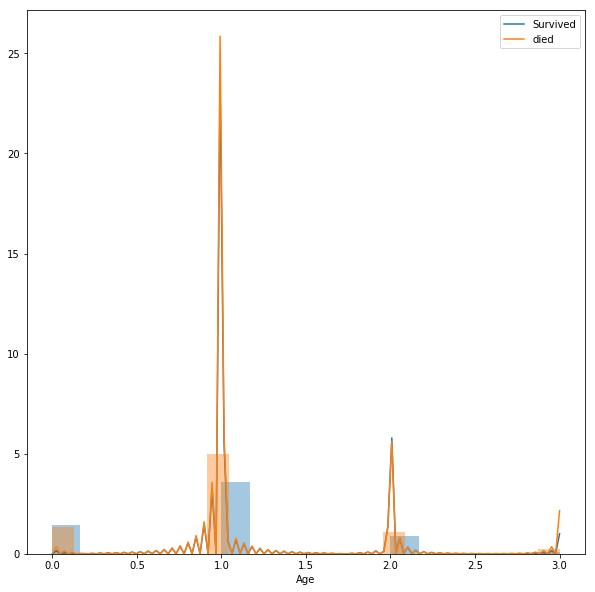

In [41]:
fig=plt.figure(figsize=(10,10))
sns.distplot(x_train.loc[x_train["Survived"]==1]["Age"],kde_kws={"label":"Survived"})
sns.distplot(x_train.loc[x_train["Survived"]==0]["Age"],kde_kws={"label":"died"})

- We don't need "Survived" column in training set as it is in testing set

In [42]:
x_train=x_train.drop(["Survived"],1)

**Prediction**
- Now we will use logistic regression and SVM to predict our lables 

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [44]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [45]:
x_train

array([[ 0.82737724, -0.73769513,  0.01180024,  0.43279337, -0.47367361,
        -0.19857166],
       [-1.56610693,  1.35557354,  0.01180024,  0.43279337, -0.47367361,
         1.74568493],
       [ 0.82737724,  1.35557354,  0.01180024, -0.4745452 , -0.47367361,
        -0.19857166],
       ...,
       [ 0.82737724,  1.35557354,  0.01180024,  0.43279337,  2.00893337,
        -0.19857166],
       [-1.56610693, -0.73769513,  0.01180024, -0.4745452 , -0.47367361,
         1.74568493],
       [ 0.82737724, -0.73769513,  0.01180024, -0.4745452 , -0.47367361,
        -2.14282826]])

In [46]:
from sklearn.linear_model import LogisticRegression
regressor1=LogisticRegression(random_state=0)

In [47]:
regressor1.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred1=regressor1.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred1)

In [50]:
cm1

array([[255,  11],
       [  8, 144]])

- Get 95.5% accuracy with logistic regrission

In [51]:
print((255+144)/(266+152))

0.9545454545454546


In [52]:
from sklearn.svm import SVC
regressor2=SVC(kernel='rbf',random_state=0)
regressor2.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [53]:
y_pred2=regressor2.predict(x_test)
cm2=confusion_matrix(y_test,y_pred2)

In [54]:
cm2

array([[254,  12],
       [ 29, 123]])

- Get 90.2% accuracy with SVM

In [55]:
print((254+123)/(254+123+12+29))

0.9019138755980861


In [56]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [57]:
y_pred1=pd.DataFrame(y_pred1)
y_pred1

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [58]:
y_pred1["PassengerId"]=gender_submission["PassengerId"]
y_pred1["Survived"]=y_pred1.loc[:,0]
y_pred1=y_pred1.drop(y_pred1.columns[0],1)

In [59]:
y_pred1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [60]:
y_pred1.to_csv('SurvivedPrediction.csv',index=False)